# Import Libs and Read data

In [24]:
# Importing general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler,  PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer



# Class Imbalance
from imblearn.over_sampling import SMOTE

## Model Selection and Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


# Machine Learning Models
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [25]:
loan= pd.read_csv('/content/raw-data.csv',low_memory=False)

In [26]:
loan.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0


# Prelim Data Prep

In [30]:
#Renaming columns in the dataset with their correct names
loan = loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
loan.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


# EDA

In [31]:
#EDA.

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

Text(0.5, 1.0, 'Missing Values Heatmap')

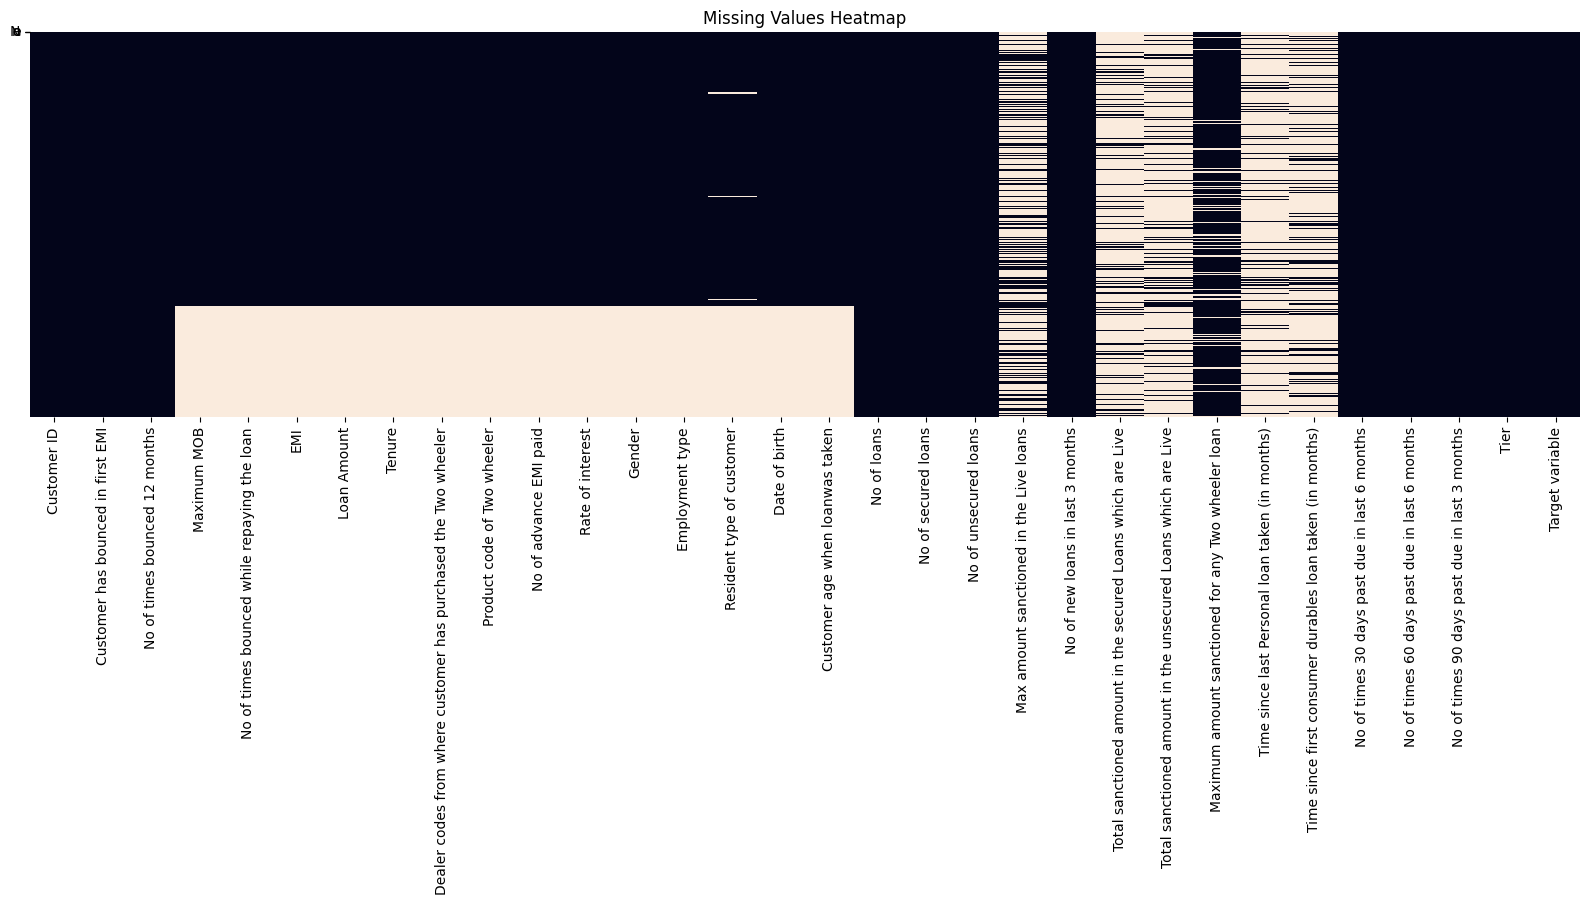

In [32]:
#missingness
plt.figure(figsize=(20,5))

sns.heatmap(loan.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

## Insights
1.some variables are missing more than 50% threshold will drop them as they wont affect the final model

2.We will impute with median for the missing values so that we dont create a bias in our data

3.For categorical we will impute with mode


4.theres an entire block of data missing in between we will remove those rows

In [34]:
# Separating the numerical variables from the categorical variables
cat_var=loan.select_dtypes(include=[object])
#cat_var.head(1)

In [35]:
num_var = loan.select_dtypes(include=['float','int'])
#num_var.head(1)

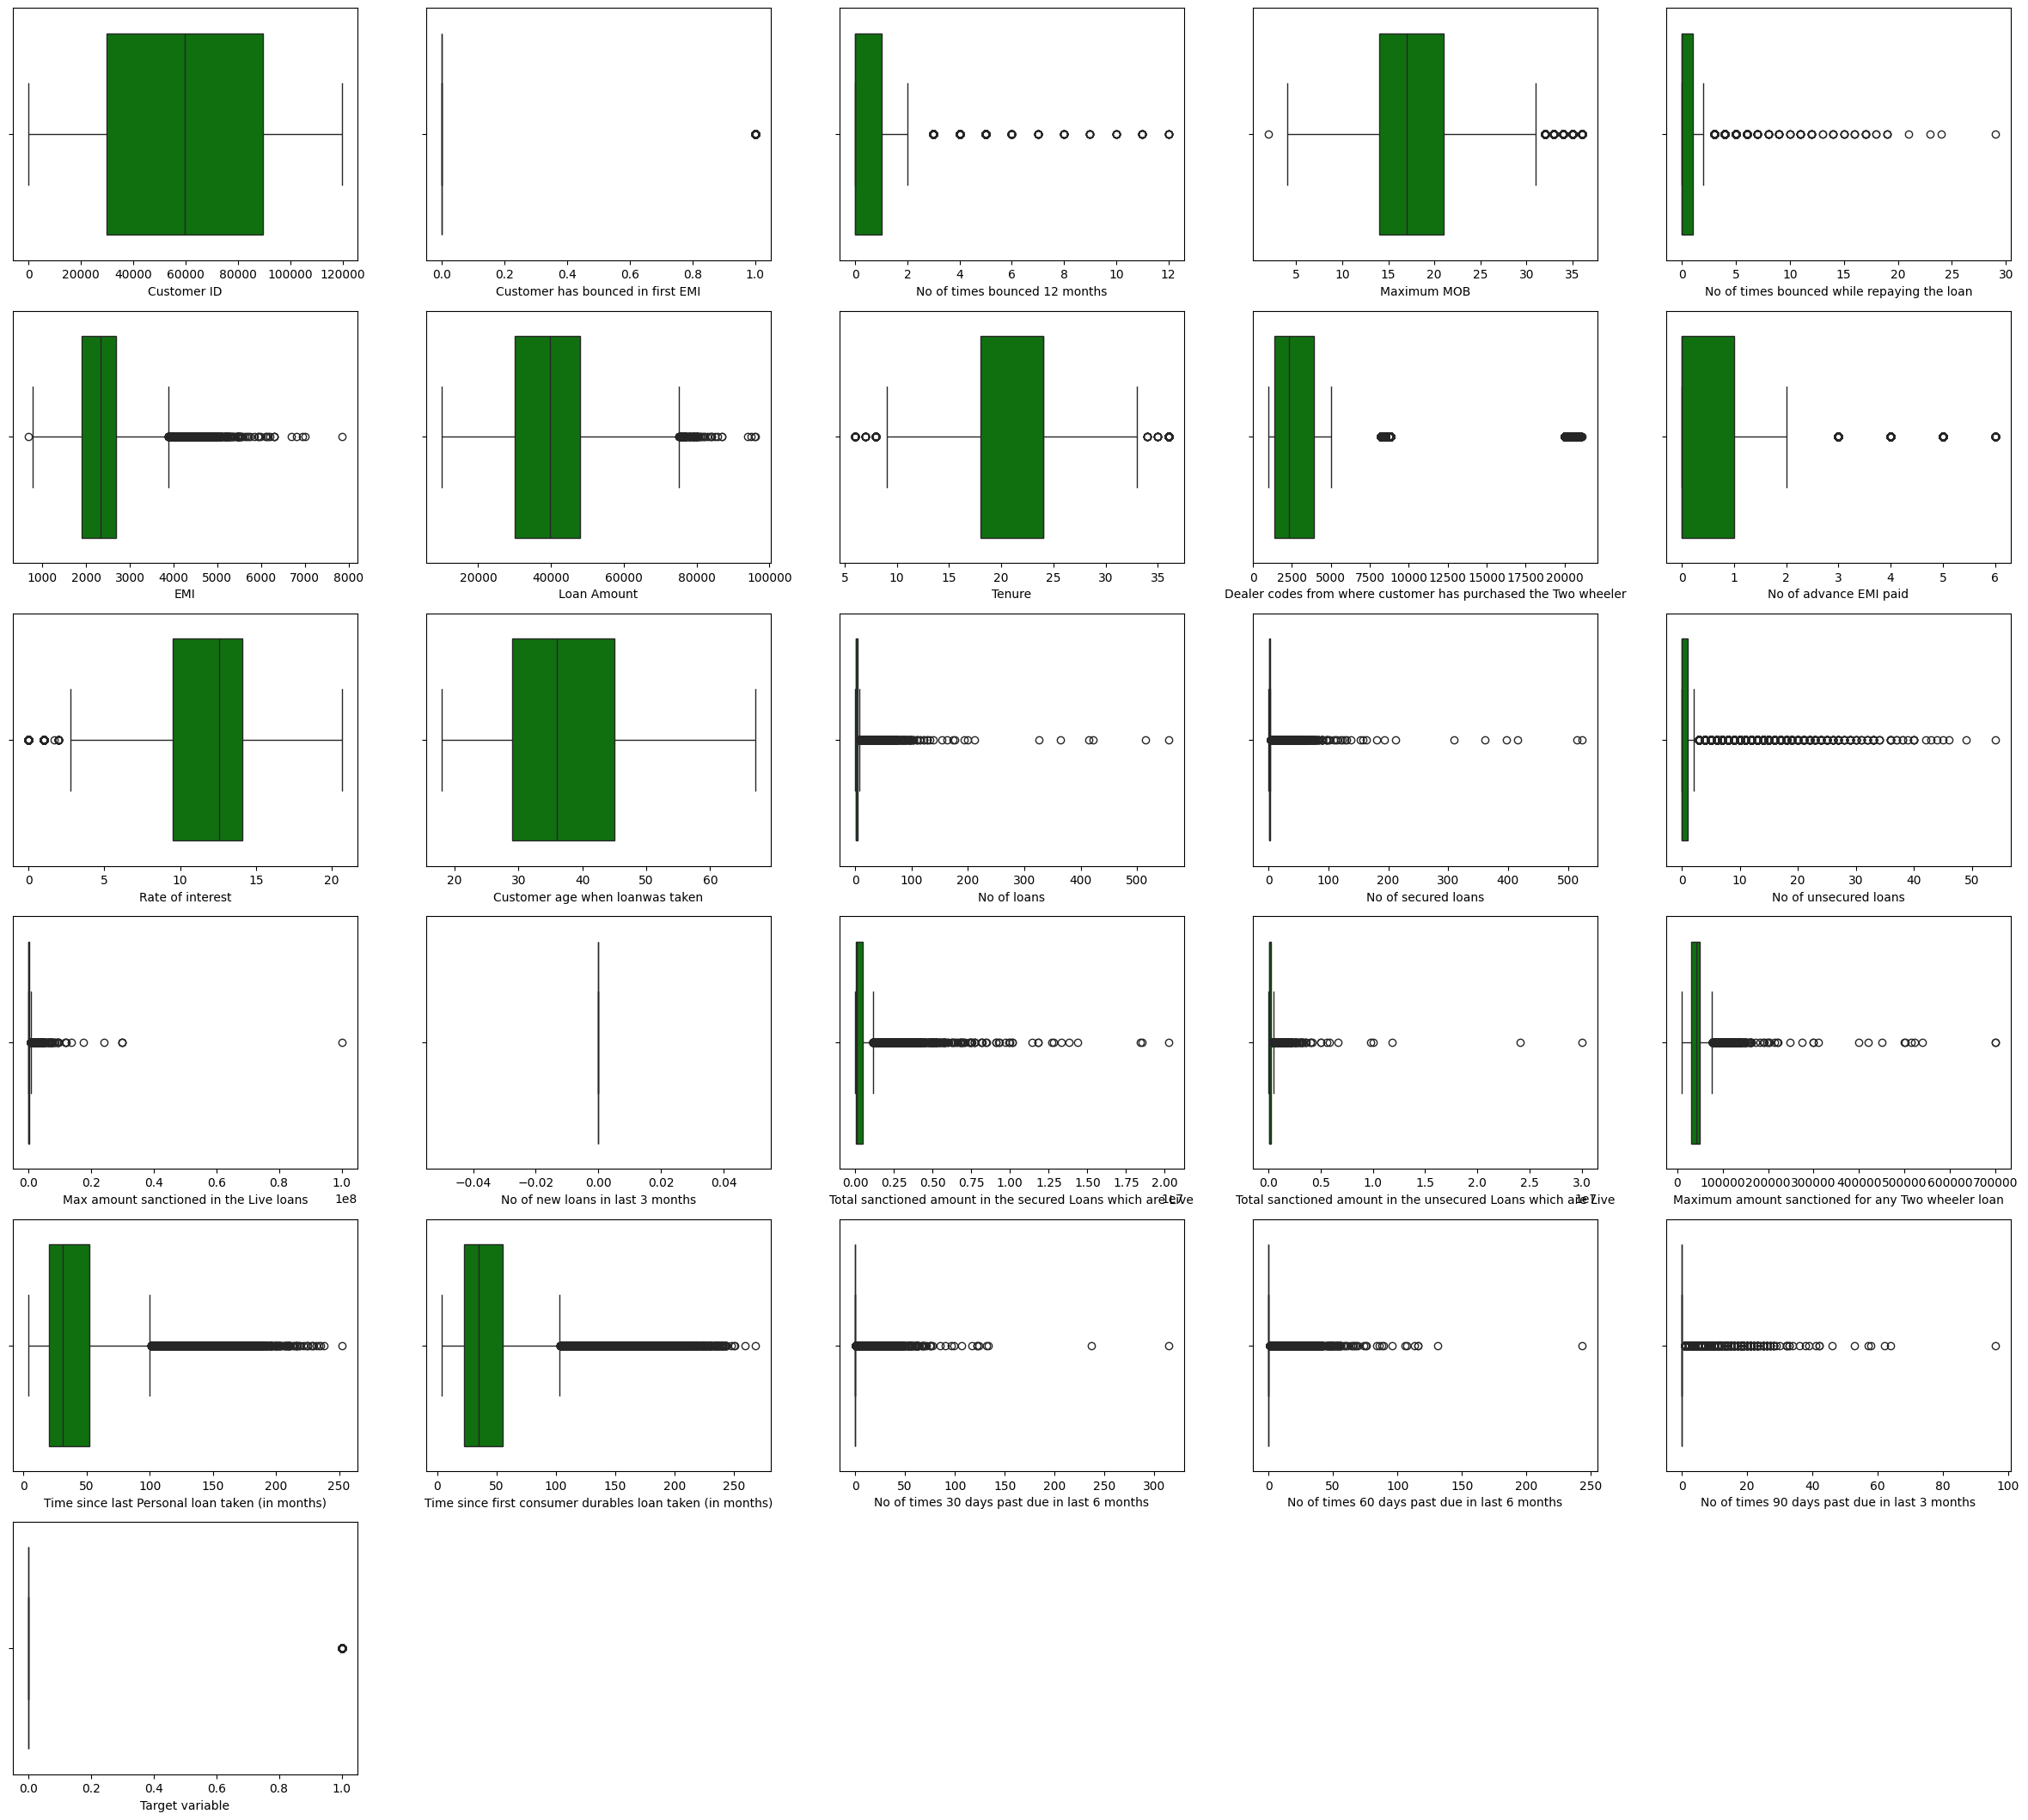

In [36]:
#Outliers analysis of numerical variables

fig = plt.figure(figsize=(30,45))
for i,j in zip(num_var,range(len(num_var.columns))):
    ax = fig.add_subplot(10,5, j+1)
    sns.boxplot(data=loan,x=loan[i],color="Green")

##Insights
1.Most of the numerical variable have outliers.


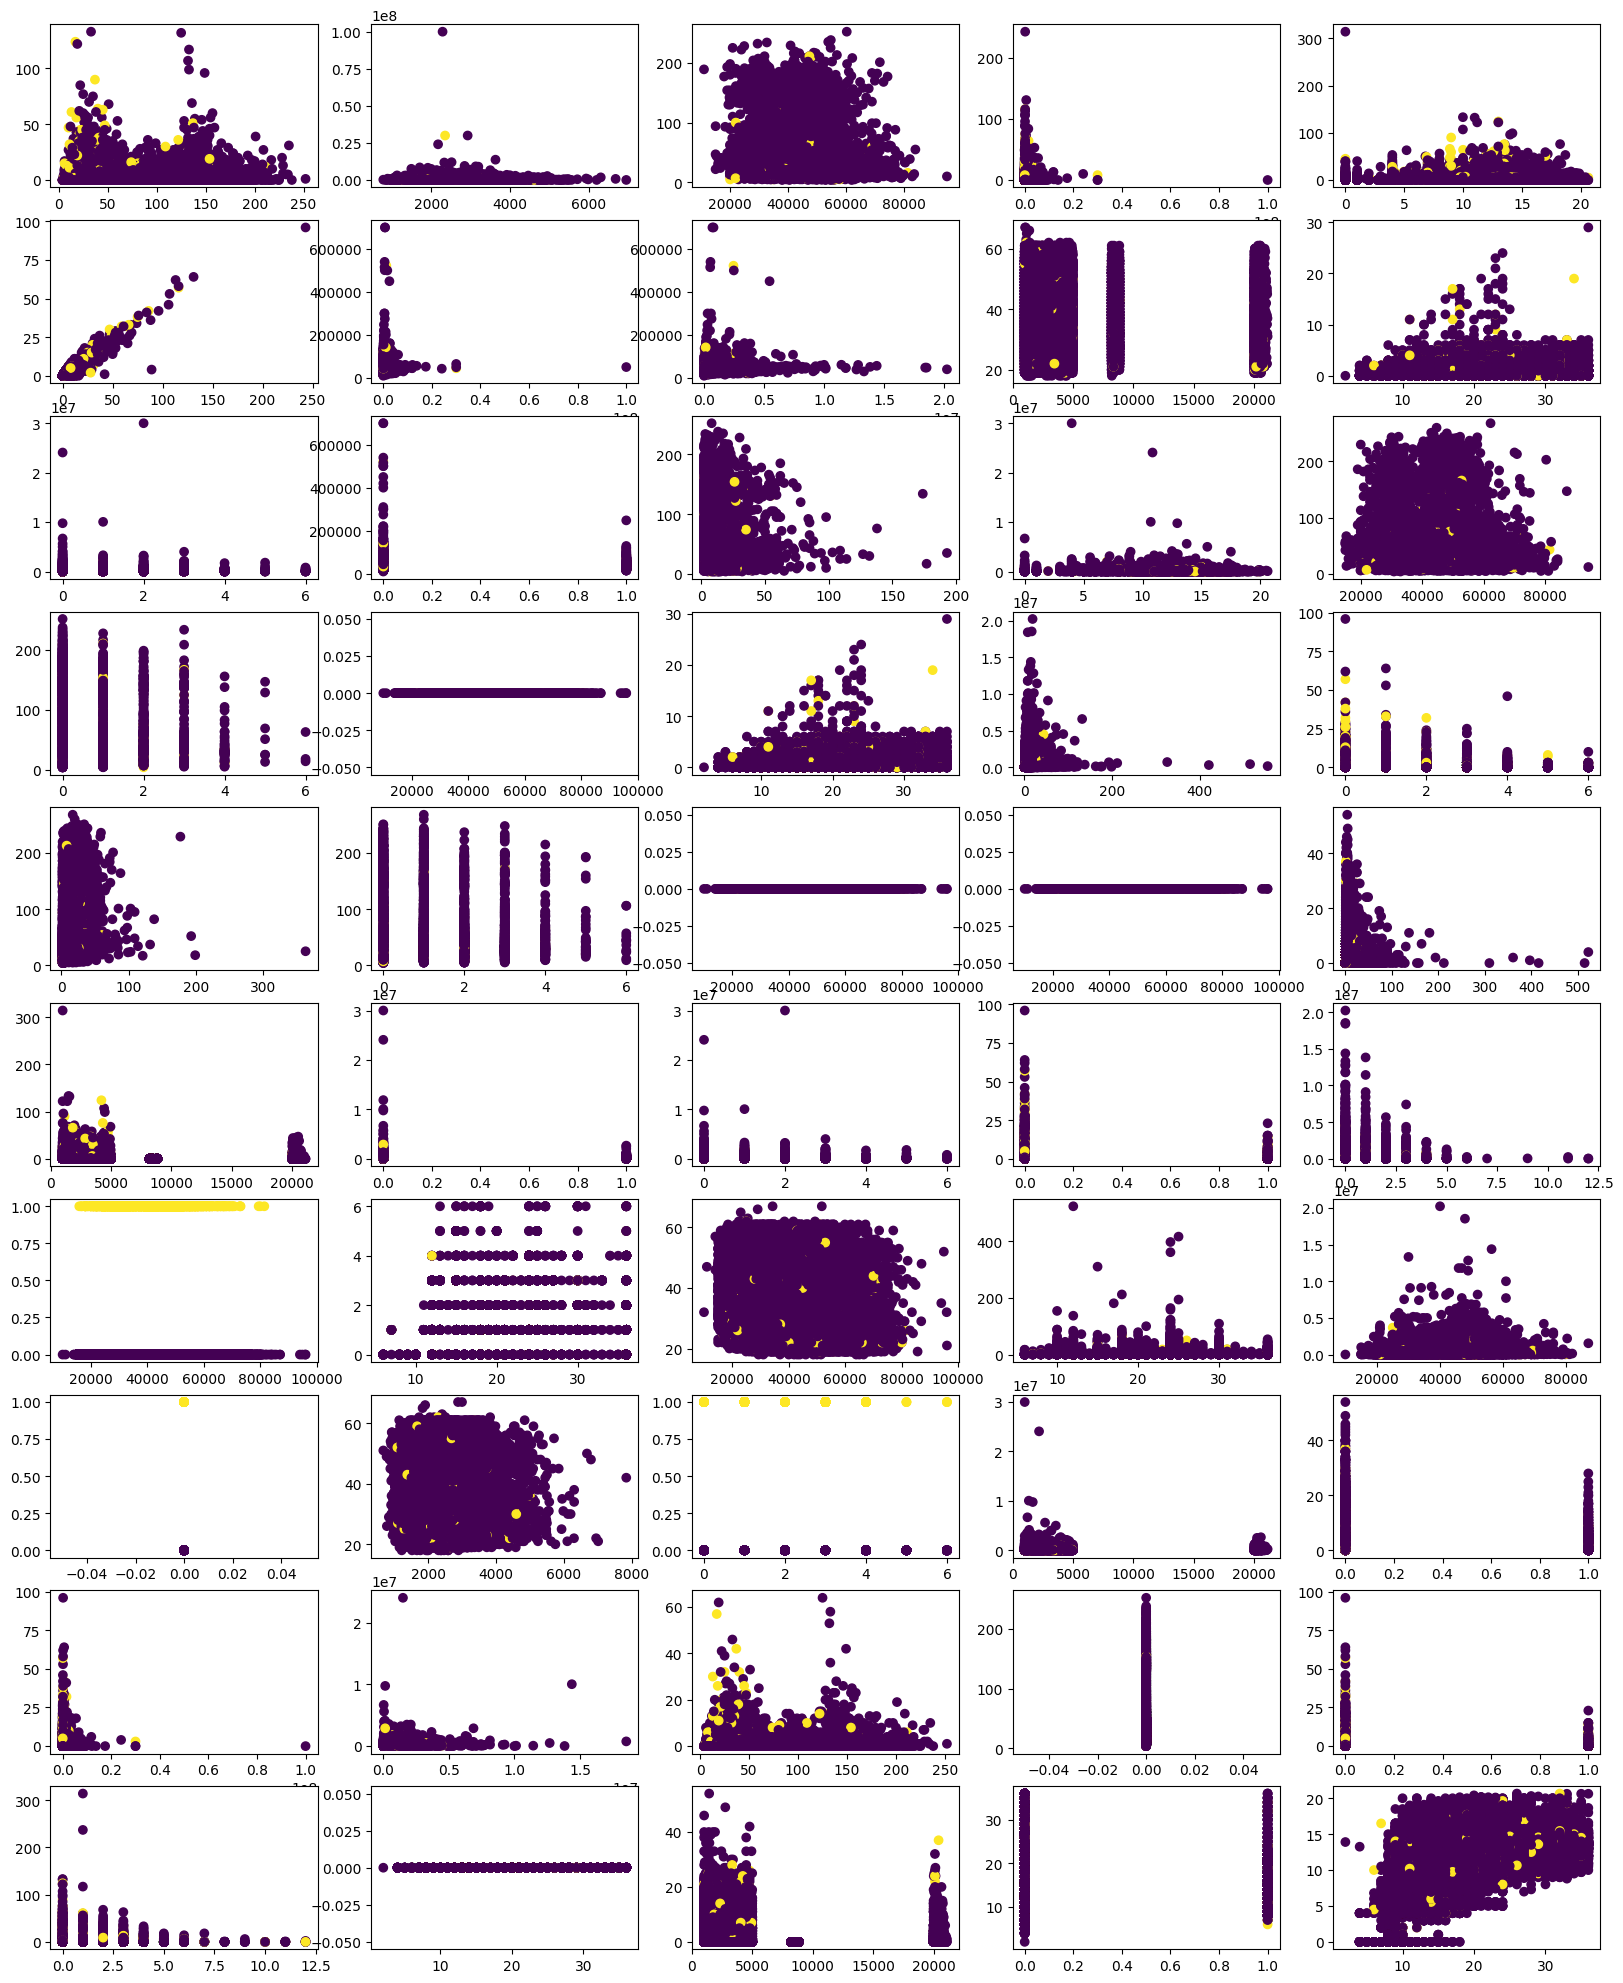

In [43]:
#Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(num_var.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=50) #Randomly choose 50 bivariate relationships to visualise.
loan['Target variable'] = loan['Target variable'].astype('int') # Convert our tarrget variable to categorical because it is classification.

fig = plt.figure(figsize=(20,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(num_var[num_var.columns[rand[i][0]]],num_var[num_var.columns[rand[i][1]]],c=loan["Target variable"])

##Intuition/Insights
Most of the variables are not linearly seperable. SVM or Ensemble will work best for modelling

In [44]:
#Checking for class imbalance/Or not
loan['Target variable'].value_counts()

Target variable
0    116914
1      2614
Name: count, dtype: int64

Text(0.5, 1.0, 'Ratio of Customers Who Defaulted and Who did Not')

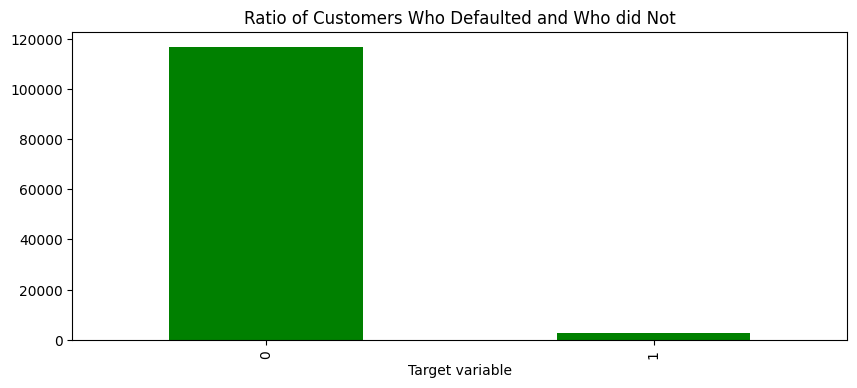

In [49]:
#plotting
loan['Target variable'].value_counts().plot(kind = "bar", figsize = (10,4),color='Green')
plt.title("Ratio of Customers Who Defaulted and Who did Not")

##Insights
We have a classic case of class imbalance, we will need to generate synthetic data to take care of the minority class
(using SMOTE )

# DATA CLEANING

In [50]:
data=loan.copy()

In [51]:
#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=cat_var.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=num_var.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [53]:
data.head(1)

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,total_sanctioned_amount_in_the_secured_loans_which_are_live,total_sanctioned_amount_in_the_unsecured_loans_which_are_live,maximum_amount_sanctioned_for_any_two_wheeler_loan,time_since_last_personal_loan_taken_in_months,time_since_first_consumer_durables_loan_taken_in_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0


In [55]:
# For columns with more than 50% missing delete
data.dropna(thresh=data.shape[0]*0.5,axis=1, inplace = True)

# impute with median for numeric and mode for the categorical
fill = dict()

for i in range(len(data.columns)):

    if data.columns[i] in num_var:
        fill[data.columns[i]] = data[data.columns[i]].median()

    else:
        fill[data.columns[i]] = str(data[data.columns[i]].mode()).split()[1]

print(len(fill))
data = data.fillna(value=fill)

27


In [56]:
#Encoding
#OneHotEncode for Categorical_Variables
#Ordinal Encode for Ordinal Data(ordered)
cat_var.head(1)

,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Date of birth,Tier
0,SC,FEMALE,HOUSEWIFE,OWNED,30-05-1974,TIER 1


In [59]:
#tier is ordinal data..
transform_col = make_column_transformer((OrdinalEncoder(),['tier']),(OneHotEncoder(), ['product_code_of_two_wheeler','gender','employment_type','resident_type_of_customer']), remainder="passthrough")
data_transformed = transform_col.fit_transform(data)

print(data_transformed.shape)

(119528, 38)


In [61]:
pd.DataFrame(data_transformed).head(1)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,40.0,1,1,0,0,46500.0,0,0,0,0


In [62]:
X = data_transformed[:,:37]
y = data.target_variable
print(X.shape,y.shape)

(119528, 37) (119528,)


In [63]:
## Class Imbalance
# Smote - Synthetic Minority Oversampling Technique

smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
X, y=smote_sample.fit_resample(X,y)

ValueError: could not convert string to float: '30-05-1974'

# Model Selection

In [64]:
#Train Test Split: Reserve 25% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(89646, 37) (29882, 37) (89646,) (29882,)


In [65]:
# Support vector classification - RBF Kernel
pipe = make_pipeline(PolynomialFeatures(degree=1), SVC(kernel='rbf',C=5))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_polynomial.py", line 252, in fit
    _, n_features = self._validate_data(X, accept_sparse=True).shape
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: '09-03-1988'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_polynomial.py", line 252, in fit
    _, n_features = self._validate_data(X, accept_sparse=True).shape
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: '15-07-1959'


In [ ]:
# classification - Random Forest
pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

In [ ]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=1), LogisticRegression(penalty='none', solver='lbfgs'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())